In [1]:
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt

# 問題1　不純度を求める関数

In [2]:
a = np.array([1,1,2,2,2])
a

array([1, 1, 2, 2, 2])

In [3]:
u,counts = np.unique(a, return_counts=True)
print('unique',u,'unique_counts',counts)

unique [1 2] unique_counts [2 3]


In [4]:
u==2

array([False,  True])

In [5]:
counts[u==2]

array([3], dtype=int64)

In [6]:
np.sum(counts)

5

In [7]:
def calc_gini(y):
    labels, counts = np.unique(y, return_counts=True)
    _gini = 0
    for label in labels:
        _gini += (counts[labels==label]/np.sum(counts))**2
    gini = 1 - _gini
    return gini

In [8]:
X = np.array([0,2,1,-1,4])
y = np.array([0,0,0,1,1])
threshold_value = np.unique(X)
print('threshold_value',threshold_value)

threshold_value [-1  0  1  2  4]


In [9]:
# ラベル値による分類
u,counts = np.unique(y,return_counts=True)
print('unique',u,'unique_counts',counts)

unique [0 1] unique_counts [3 2]


In [10]:
# 各しきい値におけるジニ不純物の計算
for i in threshold_value[1:]:
    c1 = y[X < i]
    c2 = y[X >=i]
    
    print(i,'c1',c1,'c2',c2)
    print(i,'gini_left:',calc_gini(c1),'gini_right:',calc_gini(c2))

0 c1 [1] c2 [0 0 0 1]
0 gini_left: [0.] gini_right: [0.375]
1 c1 [0 1] c2 [0 0 1]
1 gini_left: [0.5] gini_right: [0.44444444]
2 c1 [0 0 1] c2 [0 1]
2 gini_left: [0.44444444] gini_right: [0.5]
4 c1 [0 0 0 1] c2 [1]
4 gini_left: [0.375] gini_right: [0.]


# 問題2　情報利得を求める関数

In [11]:
'''
左ノードクラス1 : サンプル数10
左ノードクラス2 : サンプル数30
右ノードクラス1 : サンプル数20
右ノードクラス2 : サンプル数5
→ 情報利得0.143
'''
a = 40/65 * (1-(0.25**2 + 0.75**2))
b = 25/65 * (1- (0.8**2 + 0.2**2))
c = 1- ((30/65)**2 + (35/65)**2)
d = c-a-b
d

0.14319526627218937

## 明日聞く

In [12]:
def calc_ig(X, y, threshold):
    labels_l = y[X[:] < threshold]
    labels_r = y[X[:] >= threshold]
    gain_l = (len(labels_l)/(len(labels_l)+len(labels_r)))*calc_gini(labels_l)
    gain_r = (len(labels_r)/(len(labels_l)+len(labels_r)))*calc_gini(labels_r)
    # なぜ例題ではcalc_gini(X)になっているのか？
    gain = calc_gini(y) - gain_l - gain_r
    return gain

In [13]:
X = np.array([0,2,1,-1,4])
y = np.array([0,0,0,1,1])
threshold_value = np.unique(X)
print('threshold_value',threshold_value)

threshold_value [-1  0  1  2  4]


In [14]:
X[:,]

array([ 0,  2,  1, -1,  4])

In [15]:
y[X[:,]<0]

array([1])

In [16]:
for i in threshold_value[1:]:
    print(i,calc_ig(X,y,i))

0 [0.18]
1 [0.01333333]
2 [0.01333333]
4 [0.18]


# 問題3　学習

In [17]:
# クラスに書き加える関数
def fit(self, X, y):
    """
    決定木分類器を学習する
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        訓練データの特徴量
    y : 次の形のndarray, shape (n_samples, )
        訓練データの正解値
    """
    self.gain = 0
    for feature_index in range(X.shape[1]):
        self.thresholds = np.unique(X[:,feature_index])
        for threshold in self.thresholds:
            _gain = self._calc_ig(X,feature_index,y,threshold)
            if _gain > self.gain:
                self.l_label = collections.Counter(y[X[:,feature_index] < threshold]).most_common()[0][0]
                self.r_label = collections.Counter(y[X[:,feature_index] >= threshold]).most_common()[0][0]
                self.feature = feature_index
                self.threshold = threshold
                self.gain = _gain
                if self.verbose:
                    print('feature', self.feature, 'threshold', self.threshold, 'gain', self.gain)

In [18]:
# Sample data 2
X = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
              [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
              [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
              [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
              [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
              [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
              [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
              [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
              [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
              [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
              [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
              [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
              [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
              [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
              [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
              [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
              [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
              [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
              [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
              [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])

y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              1, 1,1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [19]:
# トレーニング データと検証データに分割
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X,y,train_size=0.8,random_state=None)

print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(32, 2)
(32,)
(8, 2)
(8,)


In [20]:
def predict(self, X):
    """
    決定木分類器を使いラベルを推定する
    """
    prediction = np.where(X[:, self.feature] < self.threshold, self.l_label, self.r_label)
    return prediction

In [21]:
class ScratchDecesionTreeClassifierDepth1():
    """
    深さ1の決定木分類器のスクラッチ実装

    Parameters
    ----------
    verbose : bool
      学習過程を出力する場合はTrue
    """

    def __init__(self, verbose=False):
        # ハイパーパラメータを属性として記録
        self.verbose = verbose
        
    def _calc_gini(self, y):
        labels, counts = np.unique(y, return_counts=True)
        _gini = 0
        for label in labels:
            _gini += (counts[labels==label]/np.sum(counts))**2
        gini = 1 - _gini
        return gini
        
    def _calc_ig(self, X, feature_index, y, threshold):
        labels_l = y[X[:,feature_index] < threshold]
        labels_r = y[X[:,feature_index] >= threshold]
        gain_l = (len(labels_l)/(len(labels_l)+len(labels_r))) * self._calc_gini(labels_l)
        gain_r = (len(labels_r)/(len(labels_l)+len(labels_r))) * self._calc_gini(labels_r)
        # なぜ例題ではcalc_gini(X)になっているのか？
        gain = self._calc_gini(y) - gain_l - gain_r
        return gain

    def fit(self, X, y):
        """
        決定木分類器を学習する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        """
        self.gain = 0
        for feature_index in range(X.shape[1]):
            self.thresholds = np.unique(X[:,feature_index])
            for threshold in self.thresholds:
                _gain = self._calc_ig(X,feature_index,y,threshold)
                if _gain > self.gain:
                    self.l_label = collections.Counter(y[X[:,feature_index] < threshold]).most_common()[0][0]
                    self.r_label = collections.Counter(y[X[:,feature_index] >= threshold]).most_common()[0][0]
                    self.feature = feature_index
                    self.threshold = threshold
                    self.gain = _gain
                    if self.verbose:
                        print('feature', self.feature, 'threshold', self.threshold, 'gain', self.gain)

    def predict(self, X):
        """
        決定木分類器を使いラベルを推定する
        """
        prediction = np.where(X[:, self.feature] < self.threshold, self.l_label, self.r_label)
        return prediction

In [22]:
clf1 = ScratchDecesionTreeClassifierDepth1(verbose=True)
clf1.fit(X_train,y_train)

feature 0 threshold -4.1013 gain [0.01417591]
feature 0 threshold -2.1086 gain [0.01435122]
feature 0 threshold -0.9888 gain [0.02200521]
feature 0 threshold 0.96765 gain [0.02675058]
feature 1 threshold -3.6461 gain [0.03763021]
feature 1 threshold 5.3524 gain [0.04756378]


# 問題4　推定

In [23]:
y_pred = clf1.predict(X_valid)

In [24]:
print(y_pred)
print(y_valid)

[0 0 0 0 1 0 1 0]
[1 0 0 0 1 0 1 0]


# 問題5　学習と推定

In [25]:
# 評価指標
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)

print('accuracy',accuracy)
print('precision',precision)
print('recall',recall)
print('f1',f1)

accuracy 0.875
precision 1.0
recall 0.6666666666666666
f1 0.8


In [26]:
# 決定木
from sklearn.tree import DecisionTreeClassifier

clf2 = DecisionTreeClassifier(max_depth=1)

clf2.fit(X_train,y_train)

y_pred = clf2.predict(X_valid)

In [27]:
print(y_pred)
print(y_valid)

[0 0 0 0 1 0 1 0]
[1 0 0 0 1 0 1 0]


In [28]:
# 評価指標
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)

print('accuracy',accuracy)
print('precision',precision)
print('recall',recall)
print('f1',f1)

accuracy 0.875
precision 1.0
recall 0.6666666666666666
f1 0.8


# 問題6　決定領域の可視化

In [29]:
# 決定領域の視覚化
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X,y,model,step=0.01,
                    title='decision region', xlabel='xlabel', ylabel='ylabel',
                    target_names=['versicolor', 'virginica']
                   ):
    
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

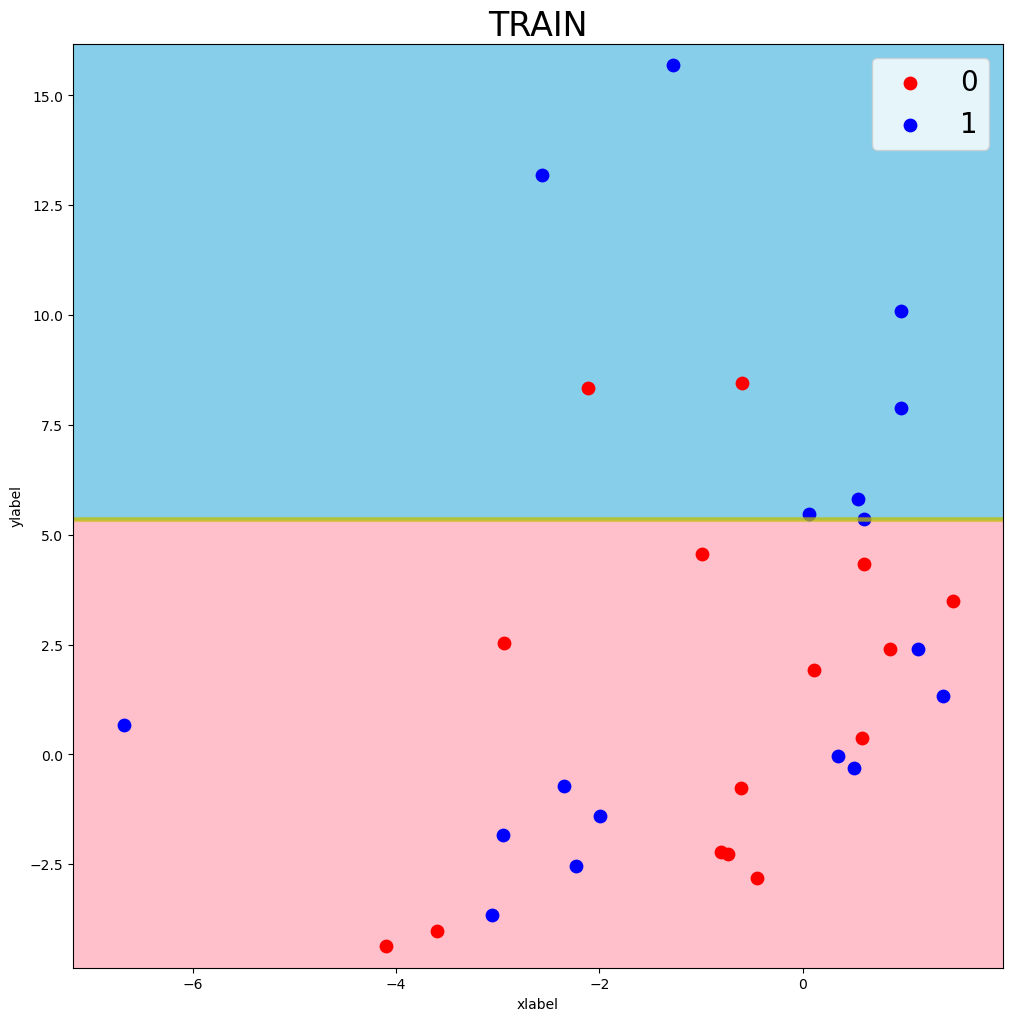

In [30]:
# スクラッチ決定木分類の結果
fit,ax = plt.subplots(figsize=(12,12))
plt.rcParams["font.size"] = 20
decision_region(X_train,y_train,clf1,target_names=['0', '1'],title='TRAIN')

# 問題7　深さ2の決定木分類器クラスの作成

In [31]:
class TreeNode():
    def __init__(self, depth, verbose=None):
        self.max_depth = depth
        self.verbose = verbose
        self.feature = None
        
    def _calc_gini(self, y):
        labels, counts = np.unique(y, return_counts=True)
        _gini = 0
        for label in labels:
            _gini += (counts[labels==label]/np.sum(counts))**2
        gini = 1 - _gini
        return gini
        
    def _calc_ig(self, X, feature_index, y, threshold):
        labels_l = y[X[:,feature_index] < threshold]
        labels_r = y[X[:,feature_index] >= threshold]
        gain_l = (len(labels_l)/(len(labels_l)+len(labels_r))) * self._calc_gini(labels_l)
        gain_r = (len(labels_r)/(len(labels_l)+len(labels_r))) * self._calc_gini(labels_r)
        # なぜ例題ではcalc_gini(X)になっているのか？
        gain = self._calc_gini(y) - gain_l - gain_r
        return gain
        
    def fit(self, X, y, depth):
        self.depth = depth
        features = X.shape[1]
        
        # 分岐後、ジニ純度が0の場合、分岐終了
        if len(np.unique(y))==1:
            self.label = np.unique(y)[0]
            return
        
        # 最大深度に達すると分岐が終了
        if self.depth == self.max_depth:
            self.label = collections.Counter(y).most_common()[0][0]
            return
        
        self.gain = 0
        for feature_index in range(X.shape[1]):
            self.thresholds = np.unique(X[:,feature_index])
            for threshold in self.thresholds:
                _gain = self._calc_ig(X,feature_index,y,threshold)
                if _gain > self.gain:
                    self.l_label = collections.Counter(y[X[:,feature_index] < threshold]).most_common()[0][0]
                    self.r_label = collections.Counter(y[X[:,feature_index] >= threshold]).most_common()[0][0]
                    self.feature = feature_index
                    self.threshold = threshold
                    self.gain = _gain
                    if self.verbose:
                        print('depth', self.depth, 'feature', self.feature, 'threshold', self.threshold, 'gain', self.gain)
        
        # 左の子ノード
        left_X = X[X[:,self.feature] < self.threshold]
        left_y = y[X[:,self.feature] < self.threshold]
        self.left_node = TreeNode(self.max_depth, self.verbose)
        self.left_node.fit(left_X, left_y, depth+1)

        # 右の子ノード
        right_X = X[X[:,self.feature] >= self.threshold]
        right_y = y[X[:,self.feature] >= self.threshold]
        self.right_node = TreeNode(self.max_depth, self.verbose)
        self.right_node.fit(right_X, right_y, depth+1)
        
    def predict(self, X):
        if self.feature == None or self.depth == self.max_depth:
            return self.label
        
        else:
            if X[self.feature] < self.threshold:
                return self.left_node.predict(X)
            else:
                return self.right_node.predict(X)

In [32]:
class ScratchDecesionTreeClassifierDepthN():
    """
    深さ1の決定木分類器のスクラッチ実装

    Parameters
    ----------
    verbose : bool
      学習過程を出力する場合はTrue
    """

    def __init__(self,max_depth=1, verbose=False):
        # ハイパーパラメータを属性として記録
        self.verbose = verbose
        self.max_depth = max_depth
        

    def fit(self, X, y):
        """
        決定木分類器を学習する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        """
        self.depth = 0
        self.root = TreeNode(self.max_depth, self.verbose)
        self.root.fit(X, y, self.depth)

    def predict(self, X):
        """
        決定木分類器を使いラベルを推定する
        """
        y_pred = np.zeros(len(X))
        
        for i,x in enumerate(X):
            y_pred[i] = self.root.predict(x)
        return y_pred

In [33]:
# スクラッチ決定木による深さ2の学習
clf3 = ScratchDecesionTreeClassifierDepthN(max_depth=2,verbose=False)
clf3.fit(X_train,y_train)

In [34]:
y_pred3 = clf3.predict(X_valid)
print(y_pred3)

[1. 1. 1. 1. 0. 1. 0. 1.]


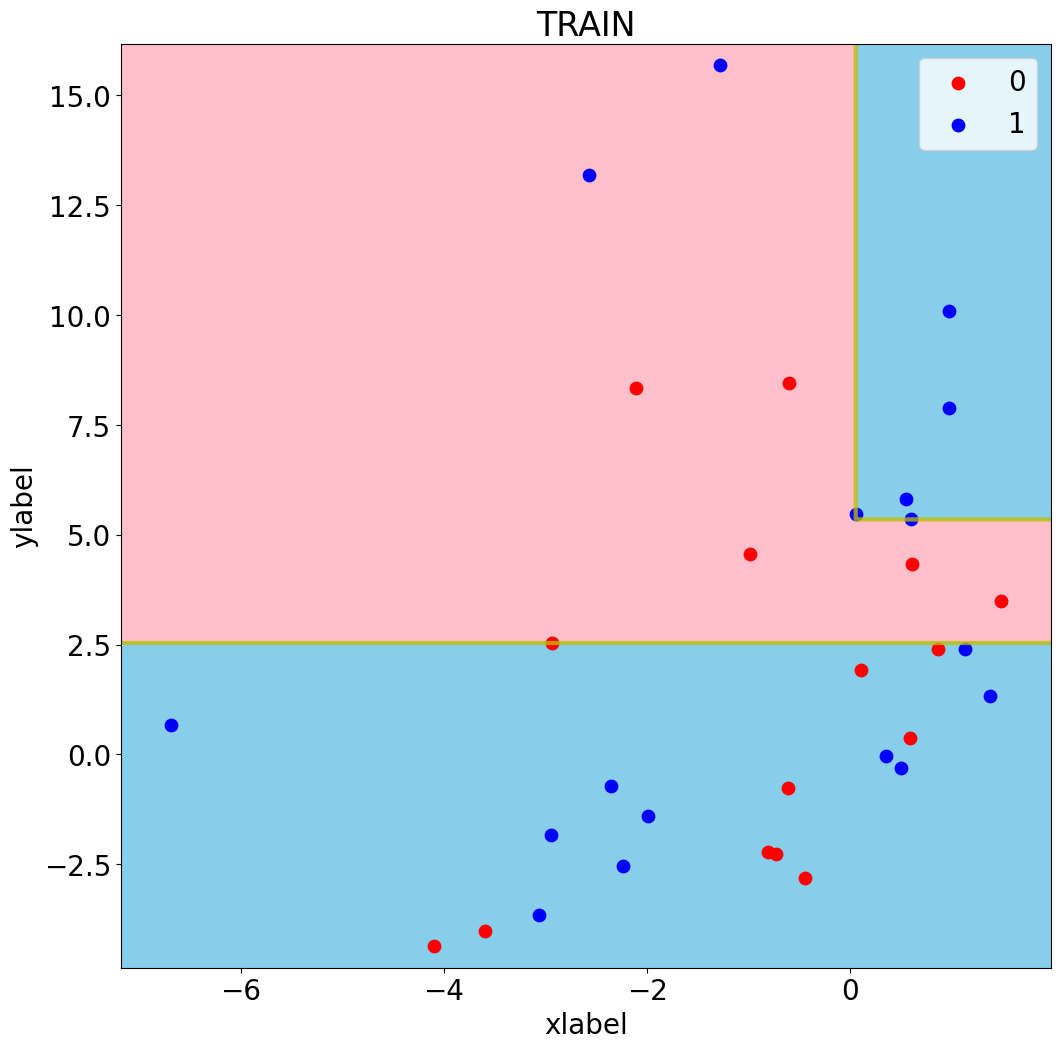

In [35]:
# Scratch決定木の決定領域 (深さ 2)
fit,ax = plt.subplots(figsize=(12,12))
plt.rcParams["font.size"] = 20
decision_region(X_train,y_train,clf3,target_names=['0', '1'],title='TRAIN')

# 問題8　深さに制限のない決定木分類器っクラスの作成

In [ ]:
# 分岐後、ジニ純度が0の場合、分岐終了
"""
if len(np.unique(y))==1:
    self.label = np.unique(y)[0]
    return
"""

In [36]:
# スクラッチ決定木の学習 (深さ n)
clf5 = ScratchDecesionTreeClassifierDepthN(max_depth=None,verbose=False)
clf5.fit(X_train,y_train)

In [37]:
y_pred5 = clf5.predict(X_valid)
print(y_pred5)

[0. 1. 1. 0. 0. 1. 0. 0.]


In [38]:
accuracy = accuracy_score(y_valid, y_pred5)
precision = precision_score(y_valid, y_pred5)
recall = recall_score(y_valid, y_pred5)
f1 = f1_score(y_valid, y_pred5)

print('accuracy',accuracy)
print('precision',precision)
print('recall',recall)
print('f1',f1)

accuracy 0.25
precision 0.0
recall 0.0
f1 0.0


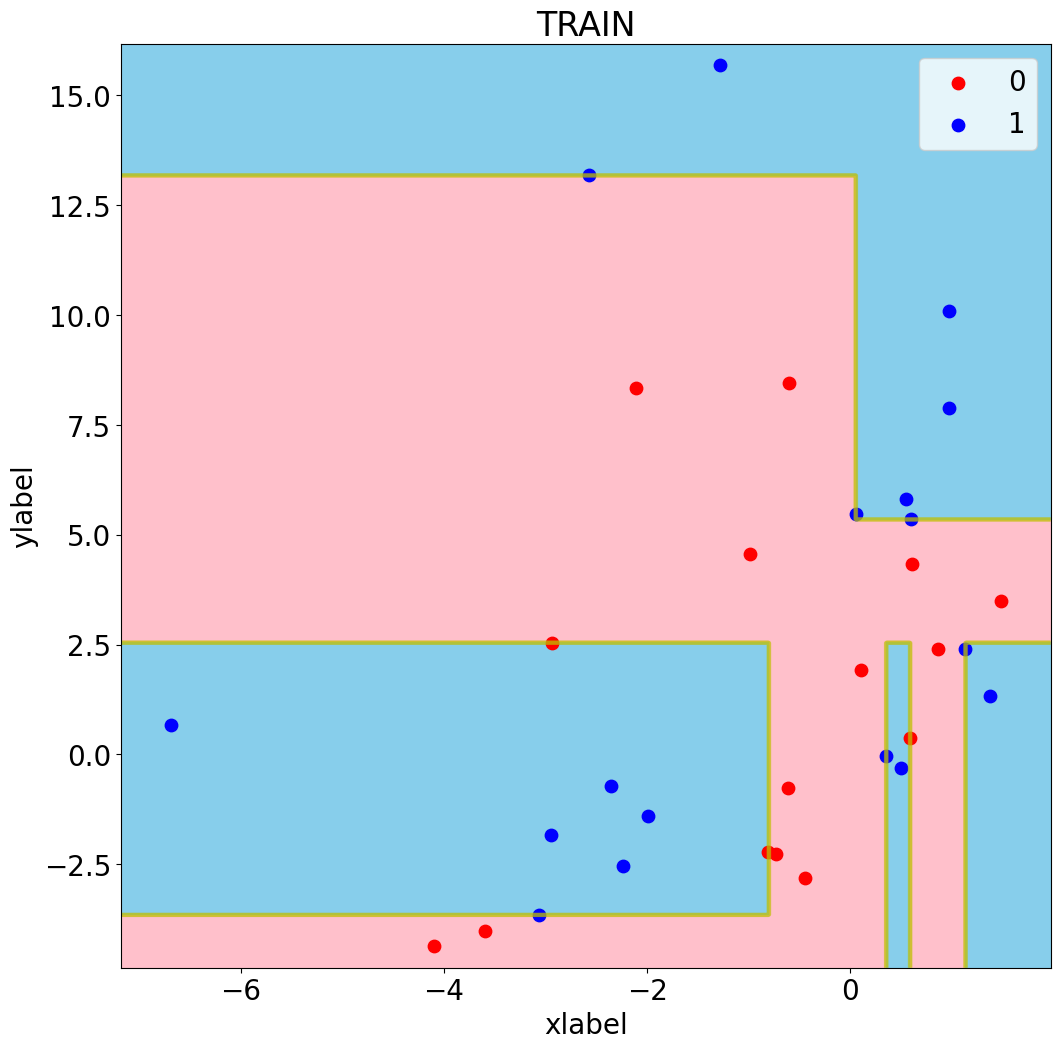

In [39]:
# スクラッチ決定木の決定領域 (深さ n)
fit,ax = plt.subplots(figsize=(12,12))
plt.rcParams["font.size"] = 20
decision_region(X_train,y_train,clf5,target_names=['0', '1'],title='TRAIN')

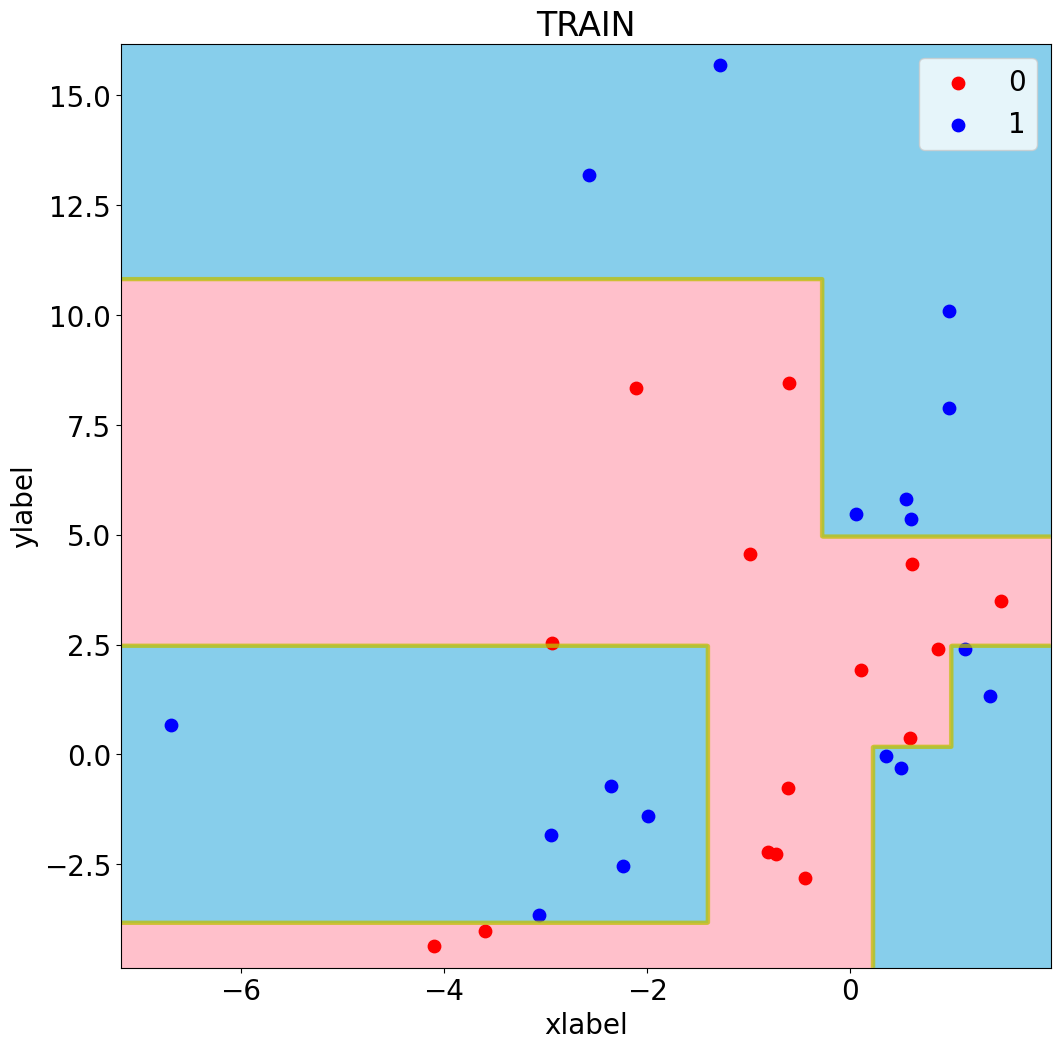

In [40]:
# Sklearn決定木の決定領域 (深さ n)
clf_sk = DecisionTreeClassifier(max_depth=None,random_state=None)
clf_sk.fit(X_train,y_train)


fit,ax = plt.subplots(figsize=(12,12))
plt.rcParams["font.size"] = 20
decision_region(X_train,y_train,clf_sk,target_names=['0', '1'],title='TRAIN')